In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv", sep=",", encoding = "cp949")
data = data.drop(labels= "SAMPLE_ID" , axis=1)
data

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,CN,EKP8,Bulk,30.736578,2020-10-15 4:03,Z517571,30.0,28,73100,20.0,...,3.77,15.9,2.730798,12,42.01,43.16,40.96,1407.668330,0.001660,3.048333
1,CN,EUC8,Container,63.220425,2019-09-17 2:55,U467618,30.0,15,37900,20.0,...,-6.72,24.5,4.289058,10,67.53,64.55,59.34,2089.046774,0.001614,17.138611
2,CN,NGG6,Container,90.427421,2019-02-23 6:43,V378315,50.0,7,115000,20.0,...,0.00,9.4,0.000000,14,65.30,66.39,56.94,603.193047,0.001743,98.827500
3,JP,TMR7,Cargo,0.000000,2020-09-18 22:06,B726632,10.0,33,1490,10.0,...,-7.31,22.1,4.693735,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000
4,RU,NNC2,Container,8.813725,2022-08-13 12:57,D215135,30.0,10,27600,10.0,...,2.31,22.8,2.345875,14,90.45,93.65,88.11,1107.944894,0.000197,96.030556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367436,CN,YRT6,Bulk,59.018184,2017-11-11 22:23,J661243,40.0,13,93200,20.0,...,NaN,NaN,NaN,6,61.25,62.21,55.70,1333.609109,0.000360,65.850000
367437,JP,QYY1,Tanker,0.000000,2022-04-29 2:58,D847216,10.0,9,1280,0.0,...,0.87,17.1,1.028558,11,105.37,109.34,104.69,1955.103846,0.000552,0.000000
367438,SG,GIW5,Container,1.768630,2022-07-14 7:58,Q635545,30.0,6,25000,20.0,...,3.36,31.7,2.557156,15,97.73,99.10,95.78,1601.291086,0.002615,0.997500
367439,JP,TMR7,Cargo,0.000000,2020-12-22 10:07,N211282,10.0,8,2400,10.0,...,-2.44,10.8,3.055715,19,49.75,50.08,47.02,1191.353331,0.000069,0.000000


In [3]:
#전체 데이터의 행,열 개수 확인
data.shape

(367441, 26)

In [4]:
#전체 데이터의 상위 5개 행 확인
data.head(5)

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,CN,EKP8,Bulk,30.736578,2020-10-15 4:03,Z517571,30.0,28,73100,20.0,...,3.77,15.9,2.730798,12,42.01,43.16,40.96,1407.668330,0.001660,3.048333
1,CN,EUC8,Container,63.220425,2019-09-17 2:55,U467618,30.0,15,37900,20.0,...,-6.72,24.5,4.289058,10,67.53,64.55,59.34,2089.046774,0.001614,17.138611
2,CN,NGG6,Container,90.427421,2019-02-23 6:43,V378315,50.0,7,115000,20.0,...,0.00,9.4,0.000000,14,65.30,66.39,56.94,603.193047,0.001743,98.827500
3,JP,TMR7,Cargo,0.000000,2020-09-18 22:06,B726632,10.0,33,1490,10.0,...,-7.31,22.1,4.693735,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000
4,RU,NNC2,Container,8.813725,2022-08-13 12:57,D215135,30.0,10,27600,10.0,...,2.31,22.8,2.345875,14,90.45,93.65,88.11,1107.944894,0.000197,96.030556


In [5]:
#전체 데이터의 수치형 변수 분포 확인
data.describe()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
count,367441.000000,367440.000000,367441.000000,367441.000000,367440.000000,367440.000000,367441.000000,367440.000000,213955.000000,213955.000000,213076.000000,213955.000000,367441.000000,367441.000000,367441.00000,367441.000000,367441.000000,367441.000000,367441.000000
mean,19.315929,30.550239,14.746082,63588.867056,16.476540,11.086708,41346.606612,205.114468,-0.297587,-0.262955,18.867344,2.706476,11.837903,65.533814,67.55712,63.209494,1348.251333,0.000877,61.877118
std,30.903272,10.957441,7.040392,63558.705308,6.047015,4.600020,39311.578997,75.867383,3.365912,3.735113,9.727090,1.387629,6.645665,20.916641,20.98516,20.630433,738.961048,0.000838,170.575224
min,0.000000,10.000000,0.000000,100.000000,0.000000,0.000000,150.000000,20.000000,-25.330000,-21.450000,-32.200000,0.000000,0.000000,13.520000,19.33000,-37.630000,286.802297,0.000005,0.000000
25%,0.000000,20.000000,10.000000,14400.000000,10.000000,10.000000,10000.000000,150.000000,-2.150000,-2.280000,12.200000,1.804286,7.000000,50.020000,51.46000,48.360000,836.349201,0.000142,0.000000
50%,6.929929,30.000000,13.000000,47400.000000,20.000000,10.000000,30700.000000,190.000000,-0.130000,0.000000,21.600000,2.618063,12.000000,62.930000,64.62000,59.140000,1187.573732,0.000552,7.949444
75%,25.693063,40.000000,18.000000,81400.000000,20.000000,10.000000,52100.000000,260.000000,1.540000,2.000000,26.600000,3.556008,17.000000,76.880000,79.30000,74.250000,1660.987616,0.001614,49.153333
max,199.980651,60.000000,80.000000,404000.000000,30.000000,20.000000,237000.000000,400.000000,17.910000,29.690000,47.600000,11.179660,23.000000,127.860000,127.98000,123.700000,4795.865609,0.002615,2159.130556


In [6]:
#전체 데이터의 모든 변수 확인
data.columns

Index(['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ATA', 'ID',
       'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT', 'LENGTH',
       'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE', 'BN',
       'ATA_LT', 'DUBAI', 'BRENT', 'WTI', 'BDI_ADJ', 'PORT_SIZE', 'CI_HOUR'],
      dtype='object')

In [7]:
# ARI_CO : 도착항의 소속국가(도착항 앞 2글자) 
data['ARI_CO'].unique()

array(['CN', 'JP', 'RU', 'AU', 'SG', 'ZA', 'KR', 'TW', 'TT', 'ID', 'BR',
       'QA', 'LV', 'MZ', 'US', 'IN', 'UA', 'CA', 'MY', 'PE', 'VN', 'FI',
       'CL', 'VE', 'PH'], dtype=object)

In [8]:
data['ARI_CO_num'] = data['ARI_CO'].map({'CN' : 1, 'JP' : 2 , 'RU' : 3, 'AU' :  4, 'SG' : 5 , 'ZA' : 6, 'KR' : 7, 'TW' :8, 'TT' : 9, 'ID' : 10, 'BR' : 11, 
'QA'  :12 , 'LV' :13, 'MZ':14, 'US':15, 'IN':16, 'UA':17, 'CA':18, 'MY':19, 'PE':20, 'VN':21, 'FI':22,'CL':23, 'VE':24, 'PH':25})
data

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR,ARI_CO_num
0,CN,EKP8,Bulk,30.736578,2020-10-15 4:03,Z517571,30.0,28,73100,20.0,...,15.9,2.730798,12,42.01,43.16,40.96,1407.668330,0.001660,3.048333,1
1,CN,EUC8,Container,63.220425,2019-09-17 2:55,U467618,30.0,15,37900,20.0,...,24.5,4.289058,10,67.53,64.55,59.34,2089.046774,0.001614,17.138611,1
2,CN,NGG6,Container,90.427421,2019-02-23 6:43,V378315,50.0,7,115000,20.0,...,9.4,0.000000,14,65.30,66.39,56.94,603.193047,0.001743,98.827500,1
3,JP,TMR7,Cargo,0.000000,2020-09-18 22:06,B726632,10.0,33,1490,10.0,...,22.1,4.693735,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000,2
4,RU,NNC2,Container,8.813725,2022-08-13 12:57,D215135,30.0,10,27600,10.0,...,22.8,2.345875,14,90.45,93.65,88.11,1107.944894,0.000197,96.030556,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367436,CN,YRT6,Bulk,59.018184,2017-11-11 22:23,J661243,40.0,13,93200,20.0,...,NaN,NaN,6,61.25,62.21,55.70,1333.609109,0.000360,65.850000,1
367437,JP,QYY1,Tanker,0.000000,2022-04-29 2:58,D847216,10.0,9,1280,0.0,...,17.1,1.028558,11,105.37,109.34,104.69,1955.103846,0.000552,0.000000,2
367438,SG,GIW5,Container,1.768630,2022-07-14 7:58,Q635545,30.0,6,25000,20.0,...,31.7,2.557156,15,97.73,99.10,95.78,1601.291086,0.002615,0.997500,5
367439,JP,TMR7,Cargo,0.000000,2020-12-22 10:07,N211282,10.0,8,2400,10.0,...,10.8,3.055715,19,49.75,50.08,47.02,1191.353331,0.000069,0.000000,2


In [9]:
# SHIP_TYPE_CATEGORY : 선종 통합 바탕으로 5대 선종으로 분류 
data['SHIP_TYPE_CATEGORY'].unique()

array(['Bulk', 'Container', 'Cargo', 'Tanker'], dtype=object)

In [10]:
data['SHIP_TYPE_CATEGORY_num'] = data['SHIP_TYPE_CATEGORY'].map({'Bulk' : 1, 'Container' : 2, 'Cargo' : 3, 'Tanker' : 4})
data

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR,ARI_CO_num,SHIP_TYPE_CATEGORY_num
0,CN,EKP8,Bulk,30.736578,2020-10-15 4:03,Z517571,30.0,28,73100,20.0,...,2.730798,12,42.01,43.16,40.96,1407.668330,0.001660,3.048333,1,1
1,CN,EUC8,Container,63.220425,2019-09-17 2:55,U467618,30.0,15,37900,20.0,...,4.289058,10,67.53,64.55,59.34,2089.046774,0.001614,17.138611,1,2
2,CN,NGG6,Container,90.427421,2019-02-23 6:43,V378315,50.0,7,115000,20.0,...,0.000000,14,65.30,66.39,56.94,603.193047,0.001743,98.827500,1,2
3,JP,TMR7,Cargo,0.000000,2020-09-18 22:06,B726632,10.0,33,1490,10.0,...,4.693735,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000,2,3
4,RU,NNC2,Container,8.813725,2022-08-13 12:57,D215135,30.0,10,27600,10.0,...,2.345875,14,90.45,93.65,88.11,1107.944894,0.000197,96.030556,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367436,CN,YRT6,Bulk,59.018184,2017-11-11 22:23,J661243,40.0,13,93200,20.0,...,NaN,6,61.25,62.21,55.70,1333.609109,0.000360,65.850000,1,1
367437,JP,QYY1,Tanker,0.000000,2022-04-29 2:58,D847216,10.0,9,1280,0.0,...,1.028558,11,105.37,109.34,104.69,1955.103846,0.000552,0.000000,2,4
367438,SG,GIW5,Container,1.768630,2022-07-14 7:58,Q635545,30.0,6,25000,20.0,...,2.557156,15,97.73,99.10,95.78,1601.291086,0.002615,0.997500,5,2
367439,JP,TMR7,Cargo,0.000000,2020-12-22 10:07,N211282,10.0,8,2400,10.0,...,3.055715,19,49.75,50.08,47.02,1191.353331,0.000069,0.000000,2,3


In [11]:
# ARI_PO : 도착항의 소속국가(도착항 앞 2글자) 0~
data['ARI_PO'].unique()

array(['EKP8', 'EUC8', 'NGG6', 'TMR7', 'NNC2', 'ZAG4', 'MIA8', 'QYY1',
       'WHH4', 'YDP4', 'KSF1', 'VYJ1', 'GIW5', 'SPG1', 'CXL1', 'BGD2',
       'FCD5', 'QQW1', 'JWI3', 'HGH2', 'IVU2', 'URE2', 'WEY7', 'LXJ7',
       'IEW6', 'UVK6', 'MMW5', 'JEN5', 'YRT6', 'VXM8', 'HYG5', 'NCU8',
       'JTD1', 'VFD8', 'AZU6', 'AIB7', 'KIU2', 'TDA5', 'WXQ2', 'MCG4',
       'QEA4', 'OZD2', 'PDL4', 'UIR7', 'QGN3', 'UJM2', 'TMW2', 'WAF5',
       'NQO4', 'CEI5', 'DMD4', 'EVL6', 'XVZ3', 'JER7', 'QTU5', 'XIU1',
       'EVX2', 'BAZ5', 'QGL7', 'PPM2', 'RKA2', 'PEL6', 'LHD1', 'URD4',
       'TXO3', 'BGX4', 'FFM2', 'YFK5', 'SLZ5', 'QRN3', 'EIA2', 'FAV3',
       'OKM4', 'OBZ3', 'CSP6', 'PAF4', 'TBL3', 'JGL5', 'TYY2', 'XGX5',
       'UEW5', 'GRQ5', 'HYV6', 'REJ1', 'PUF3', 'SXD2', 'FTQ1', 'PBQ1',
       'JDG8', 'MOC5', 'DEJ2', 'XEO4', 'GQJ7', 'EFG4', 'OOV8', 'UPI6',
       'JEA6', 'QXE2', 'DIN2', 'ZME5', 'ONW1', 'XZF6', 'RGT8'],
      dtype=object)

In [12]:
unique_ari_po = data['ARI_PO'].unique()
# 'ARI_PO' 값을 숫자로 매핑하는 딕셔너리 생성
ari_po_mapping = {value: index for index, value in enumerate(unique_ari_po)}

# 'ARI_PO' 열을 숫자로 인코딩
data['ARI_PO_num'] = data['ARI_PO'].map(ari_po_mapping)

data

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR,ARI_CO_num,SHIP_TYPE_CATEGORY_num,ARI_PO_num
0,CN,EKP8,Bulk,30.736578,2020-10-15 4:03,Z517571,30.0,28,73100,20.0,...,12,42.01,43.16,40.96,1407.668330,0.001660,3.048333,1,1,0
1,CN,EUC8,Container,63.220425,2019-09-17 2:55,U467618,30.0,15,37900,20.0,...,10,67.53,64.55,59.34,2089.046774,0.001614,17.138611,1,2,1
2,CN,NGG6,Container,90.427421,2019-02-23 6:43,V378315,50.0,7,115000,20.0,...,14,65.30,66.39,56.94,603.193047,0.001743,98.827500,1,2,2
3,JP,TMR7,Cargo,0.000000,2020-09-18 22:06,B726632,10.0,33,1490,10.0,...,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000,2,3,3
4,RU,NNC2,Container,8.813725,2022-08-13 12:57,D215135,30.0,10,27600,10.0,...,14,90.45,93.65,88.11,1107.944894,0.000197,96.030556,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367436,CN,YRT6,Bulk,59.018184,2017-11-11 22:23,J661243,40.0,13,93200,20.0,...,6,61.25,62.21,55.70,1333.609109,0.000360,65.850000,1,1,28
367437,JP,QYY1,Tanker,0.000000,2022-04-29 2:58,D847216,10.0,9,1280,0.0,...,11,105.37,109.34,104.69,1955.103846,0.000552,0.000000,2,4,7
367438,SG,GIW5,Container,1.768630,2022-07-14 7:58,Q635545,30.0,6,25000,20.0,...,15,97.73,99.10,95.78,1601.291086,0.002615,0.997500,5,2,12
367439,JP,TMR7,Cargo,0.000000,2020-12-22 10:07,N211282,10.0,8,2400,10.0,...,19,49.75,50.08,47.02,1191.353331,0.000069,0.000000,2,3,3


In [25]:
# 'ATA' 열의 문자열을 날짜와 시간으로 파싱
data['ATA'] = pd.to_datetime(data['ATA'], format='%Y-%m-%d %H:%M')

# 연도, 월, 일, 요일, 시간을 추출하여 새로운 열로 추가
data['ATA_Year'] = data['ATA'].dt.year
data['ATA_Month'] = data['ATA'].dt.month
data['ATA_Day'] = data['ATA'].dt.day
data['ATA_DayOfWeek'] = data['ATA'].dt.dayofweek  # 요일 (월요일: 0, 일요일: 6)
data['ATA_Hour'] = data['ATA'].dt.hour

data

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,PORT_SIZE,CI_HOUR,ARI_CO_num,SHIP_TYPE_CATEGORY_num,ARI_PO_num,ATA_Year,ATA_Month,ATA_Day,ATA_DayOfWeek,ATA_Hour
0,CN,EKP8,Bulk,30.736578,2020-10-15 04:03:00,Z517571,30.0,28,73100,20.0,...,0.001660,3.048333,1,1,0,2020,10,15,3,4
1,CN,EUC8,Container,63.220425,2019-09-17 02:55:00,U467618,30.0,15,37900,20.0,...,0.001614,17.138611,1,2,1,2019,9,17,1,2
2,CN,NGG6,Container,90.427421,2019-02-23 06:43:00,V378315,50.0,7,115000,20.0,...,0.001743,98.827500,1,2,2,2019,2,23,5,6
3,JP,TMR7,Cargo,0.000000,2020-09-18 22:06:00,B726632,10.0,33,1490,10.0,...,0.000069,0.000000,2,3,3,2020,9,18,4,22
4,RU,NNC2,Container,8.813725,2022-08-13 12:57:00,D215135,30.0,10,27600,10.0,...,0.000197,96.030556,3,2,4,2022,8,13,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367436,CN,YRT6,Bulk,59.018184,2017-11-11 22:23:00,J661243,40.0,13,93200,20.0,...,0.000360,65.850000,1,1,28,2017,11,11,5,22
367437,JP,QYY1,Tanker,0.000000,2022-04-29 02:58:00,D847216,10.0,9,1280,0.0,...,0.000552,0.000000,2,4,7,2022,4,29,4,2
367438,SG,GIW5,Container,1.768630,2022-07-14 07:58:00,Q635545,30.0,6,25000,20.0,...,0.002615,0.997500,5,2,12,2022,7,14,3,7
367439,JP,TMR7,Cargo,0.000000,2020-12-22 10:07:00,N211282,10.0,8,2400,10.0,...,0.000069,0.000000,2,3,3,2020,12,22,1,10


In [29]:
# FLAG : 선박의 국적
data['FLAG'].unique()

array(["China, People's Republic Of", 'Singapore', 'Liberia', 'Nauru',
       'Panama', 'Hong Kong, China', 'Chinese Taipei', 'United Kingdom',
       'Korea, South', 'Japan', 'Marshall Islands', 'Malta',
       'Isle Of Man', 'Denmark (Dis)', 'Bahamas', 'Cayman Islands',
       'Belize', 'Portugal (Mar)', 'Indonesia', 'Unknown', 'Germany',
       'Cyprus', 'Norway (Nis)', 'Bermuda', 'Sierra Leone', 'Gabon',
       'Russia', 'Malaysia', 'Netherlands', 'India',
       'St Vincent & The Grenadines', 'Greece', 'Tuvalu', 'Comoros',
       'Antigua & Barbuda', 'Vietnam', 'Iran', 'Barbados',
       'St Kitts & Nevis', 'Israel', 'Korea, North', 'Turkey', 'Palau',
       'Belgium', 'Togo', 'Bangladesh', 'Philippines', 'Thailand',
       'Georgia', 'Kuwait', 'Jamaica', 'Niue', 'Equatorial Guinea',
       'Egypt', 'United States Of America', 'France (Fis)', 'Vanuatu',
       'Mongolia', 'United Arab Emirates', 'South Africa', 'Syria',
       'Brazil', 'Tanzania (Zanzibar)', 'Latvia', 'Chile', 'Q

In [30]:

unique_flag = data['FLAG'].unique()
# 'FLAG' 값을 숫자로 매핑하는 딕셔너리 생성
flag_mapping = {value: index for index, value in enumerate(unique_flag)}

# 'FLAG' 열을 숫자로 인코딩
data['FLAG_num'] = data['FLAG'].map(flag_mapping)

data

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,CI_HOUR,ARI_CO_num,SHIP_TYPE_CATEGORY_num,ARI_PO_num,ATA_Year,ATA_Month,ATA_Day,ATA_DayOfWeek,ATA_Hour,FLAG_num
0,CN,EKP8,Bulk,30.736578,2020-10-15 04:03:00,Z517571,30.0,28,73100,20.0,...,3.048333,1,1,0,2020,10,15,3,4,0
1,CN,EUC8,Container,63.220425,2019-09-17 02:55:00,U467618,30.0,15,37900,20.0,...,17.138611,1,2,1,2019,9,17,1,2,1
2,CN,NGG6,Container,90.427421,2019-02-23 06:43:00,V378315,50.0,7,115000,20.0,...,98.827500,1,2,2,2019,2,23,5,6,2
3,JP,TMR7,Cargo,0.000000,2020-09-18 22:06:00,B726632,10.0,33,1490,10.0,...,0.000000,2,3,3,2020,9,18,4,22,3
4,RU,NNC2,Container,8.813725,2022-08-13 12:57:00,D215135,30.0,10,27600,10.0,...,96.030556,3,2,4,2022,8,13,5,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367436,CN,YRT6,Bulk,59.018184,2017-11-11 22:23:00,J661243,40.0,13,93200,20.0,...,65.850000,1,1,28,2017,11,11,5,22,2
367437,JP,QYY1,Tanker,0.000000,2022-04-29 02:58:00,D847216,10.0,9,1280,0.0,...,0.000000,2,4,7,2022,4,29,4,2,9
367438,SG,GIW5,Container,1.768630,2022-07-14 07:58:00,Q635545,30.0,6,25000,20.0,...,0.997500,5,2,12,2022,7,14,3,7,21
367439,JP,TMR7,Cargo,0.000000,2020-12-22 10:07:00,N211282,10.0,8,2400,10.0,...,0.000000,2,3,3,2020,12,22,1,10,9


In [13]:
# 결측치 BREADTH : 선박 폭 , DEPTH : 선박 깊이 , DRAUGHT : 흘수 높이 , LENGTH : 선박 길이 , U V 풍향 벡터 , 보버트 풍량 계급 , 기온
data.isnull().sum()

ARI_CO                         0
ARI_PO                         0
SHIP_TYPE_CATEGORY             0
DIST                           0
ATA                            0
ID                             0
BREADTH                        1
BUILT                          0
DEADWEIGHT                     0
DEPTH                          1
DRAUGHT                        1
GT                             0
LENGTH                         1
SHIPMANAGER                    0
FLAG                           0
U_WIND                    153486
V_WIND                    153486
AIR_TEMPERATURE           154365
BN                        153486
ATA_LT                         0
DUBAI                          0
BRENT                          0
WTI                            0
BDI_ADJ                        0
PORT_SIZE                      0
CI_HOUR                        0
ARI_CO_num                     0
SHIP_TYPE_CATEGORY_num         0
ARI_PO_num                     0
dtype: int64

In [14]:
# 결측치 행
data[data['BREADTH'].isnull()|data['DEPTH'].isnull()|data['DRAUGHT'].isnull()|data['LENGTH'].isnull()]

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR,ARI_CO_num,SHIP_TYPE_CATEGORY_num,ARI_PO_num
23856,TW,JWI3,Cargo,0.0,2022-11-08 4:10,A457875,NaN,28,1500,NaN,...,12,92.34,95.36,88.91,1065.911239,0.00099,0.0,8,3,18


In [32]:
# String 삭제하고 새로운 DataFrame을 생성
columns_to_drop = ['ARI_CO', 'ARI_PO','SHIP_TYPE_CATEGORY','ATA','ID','SHIPMANAGER','FLAG']
data_dropped = data.drop(columns=columns_to_drop)

# 새로운 DataFrame의 상관 행렬을 계산
data_dropped.corr()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,...,CI_HOUR,ARI_CO_num,SHIP_TYPE_CATEGORY_num,ARI_PO_num,ATA_Year,ATA_Month,ATA_Day,ATA_DayOfWeek,ATA_Hour,FLAG_num
DIST,1.000000,0.025656,-0.005212,0.025504,-0.000576,0.031762,0.016052,0.025424,-0.032110,0.053500,...,0.189469,-0.207799,0.004991,-0.208125,0.018655,-0.018820,0.004247,0.106650,-0.001057,-0.027008
BREADTH,0.025656,1.000000,-0.209375,0.857017,0.790513,0.761375,0.903938,0.920609,-0.053628,0.022895,...,0.043974,0.060372,-0.455421,0.033458,-0.198306,0.008739,-0.003263,0.014207,-0.016303,-0.128023
BUILT,-0.005212,-0.209375,1.000000,-0.240538,-0.206096,-0.146999,-0.238323,-0.180347,0.011537,-0.008816,...,0.001588,-0.011159,0.086866,-0.009783,-0.121959,0.003180,-0.000553,-0.008829,0.011016,0.165259
DEADWEIGHT,0.025504,0.857017,-0.240538,1.000000,0.712965,0.813260,0.925234,0.826592,-0.029360,0.039366,...,0.078274,0.050491,-0.468268,0.088194,-0.131912,0.017555,-0.003341,0.040299,-0.019731,-0.096845
DEPTH,-0.000576,0.790513,-0.206096,0.712965,1.000000,0.581236,0.787465,0.842580,-0.042028,0.031401,...,0.052184,0.078094,-0.442841,0.092948,-0.169643,0.012445,-0.003460,0.009782,-0.006324,-0.131064
DRAUGHT,0.031762,0.761375,-0.146999,0.813260,0.581236,1.000000,0.778966,0.737686,-0.037623,0.025017,...,0.040560,0.030851,-0.420470,0.029744,-0.161634,0.010244,-0.003855,0.026027,-0.023575,-0.072875
GT,0.016052,0.903938,-0.238323,0.925234,0.787465,0.778966,1.000000,0.916535,-0.040441,0.023913,...,0.059959,0.027450,-0.347275,0.016839,-0.142216,0.010607,-0.003895,0.012392,-0.017100,-0.097147
LENGTH,0.025424,0.920609,-0.180347,0.826592,0.842580,0.737686,0.916535,1.000000,-0.052930,0.023724,...,0.035531,0.055093,-0.447111,0.017483,-0.228413,0.010289,-0.003648,0.002580,-0.013334,-0.126901
U_WIND,-0.032110,-0.053628,0.011537,-0.029360,-0.042028,-0.037623,-0.040441,-0.052930,1.000000,0.094156,...,-0.012149,0.025833,0.015134,0.023858,0.022425,0.005512,0.012083,0.004248,0.001504,0.025430
V_WIND,0.053500,0.022895,-0.008816,0.039366,0.031401,0.025017,0.023913,0.023724,0.094156,1.000000,...,0.017608,0.002342,-0.023157,0.061235,-0.024858,-0.015160,-0.003813,0.015275,0.004226,-0.000375


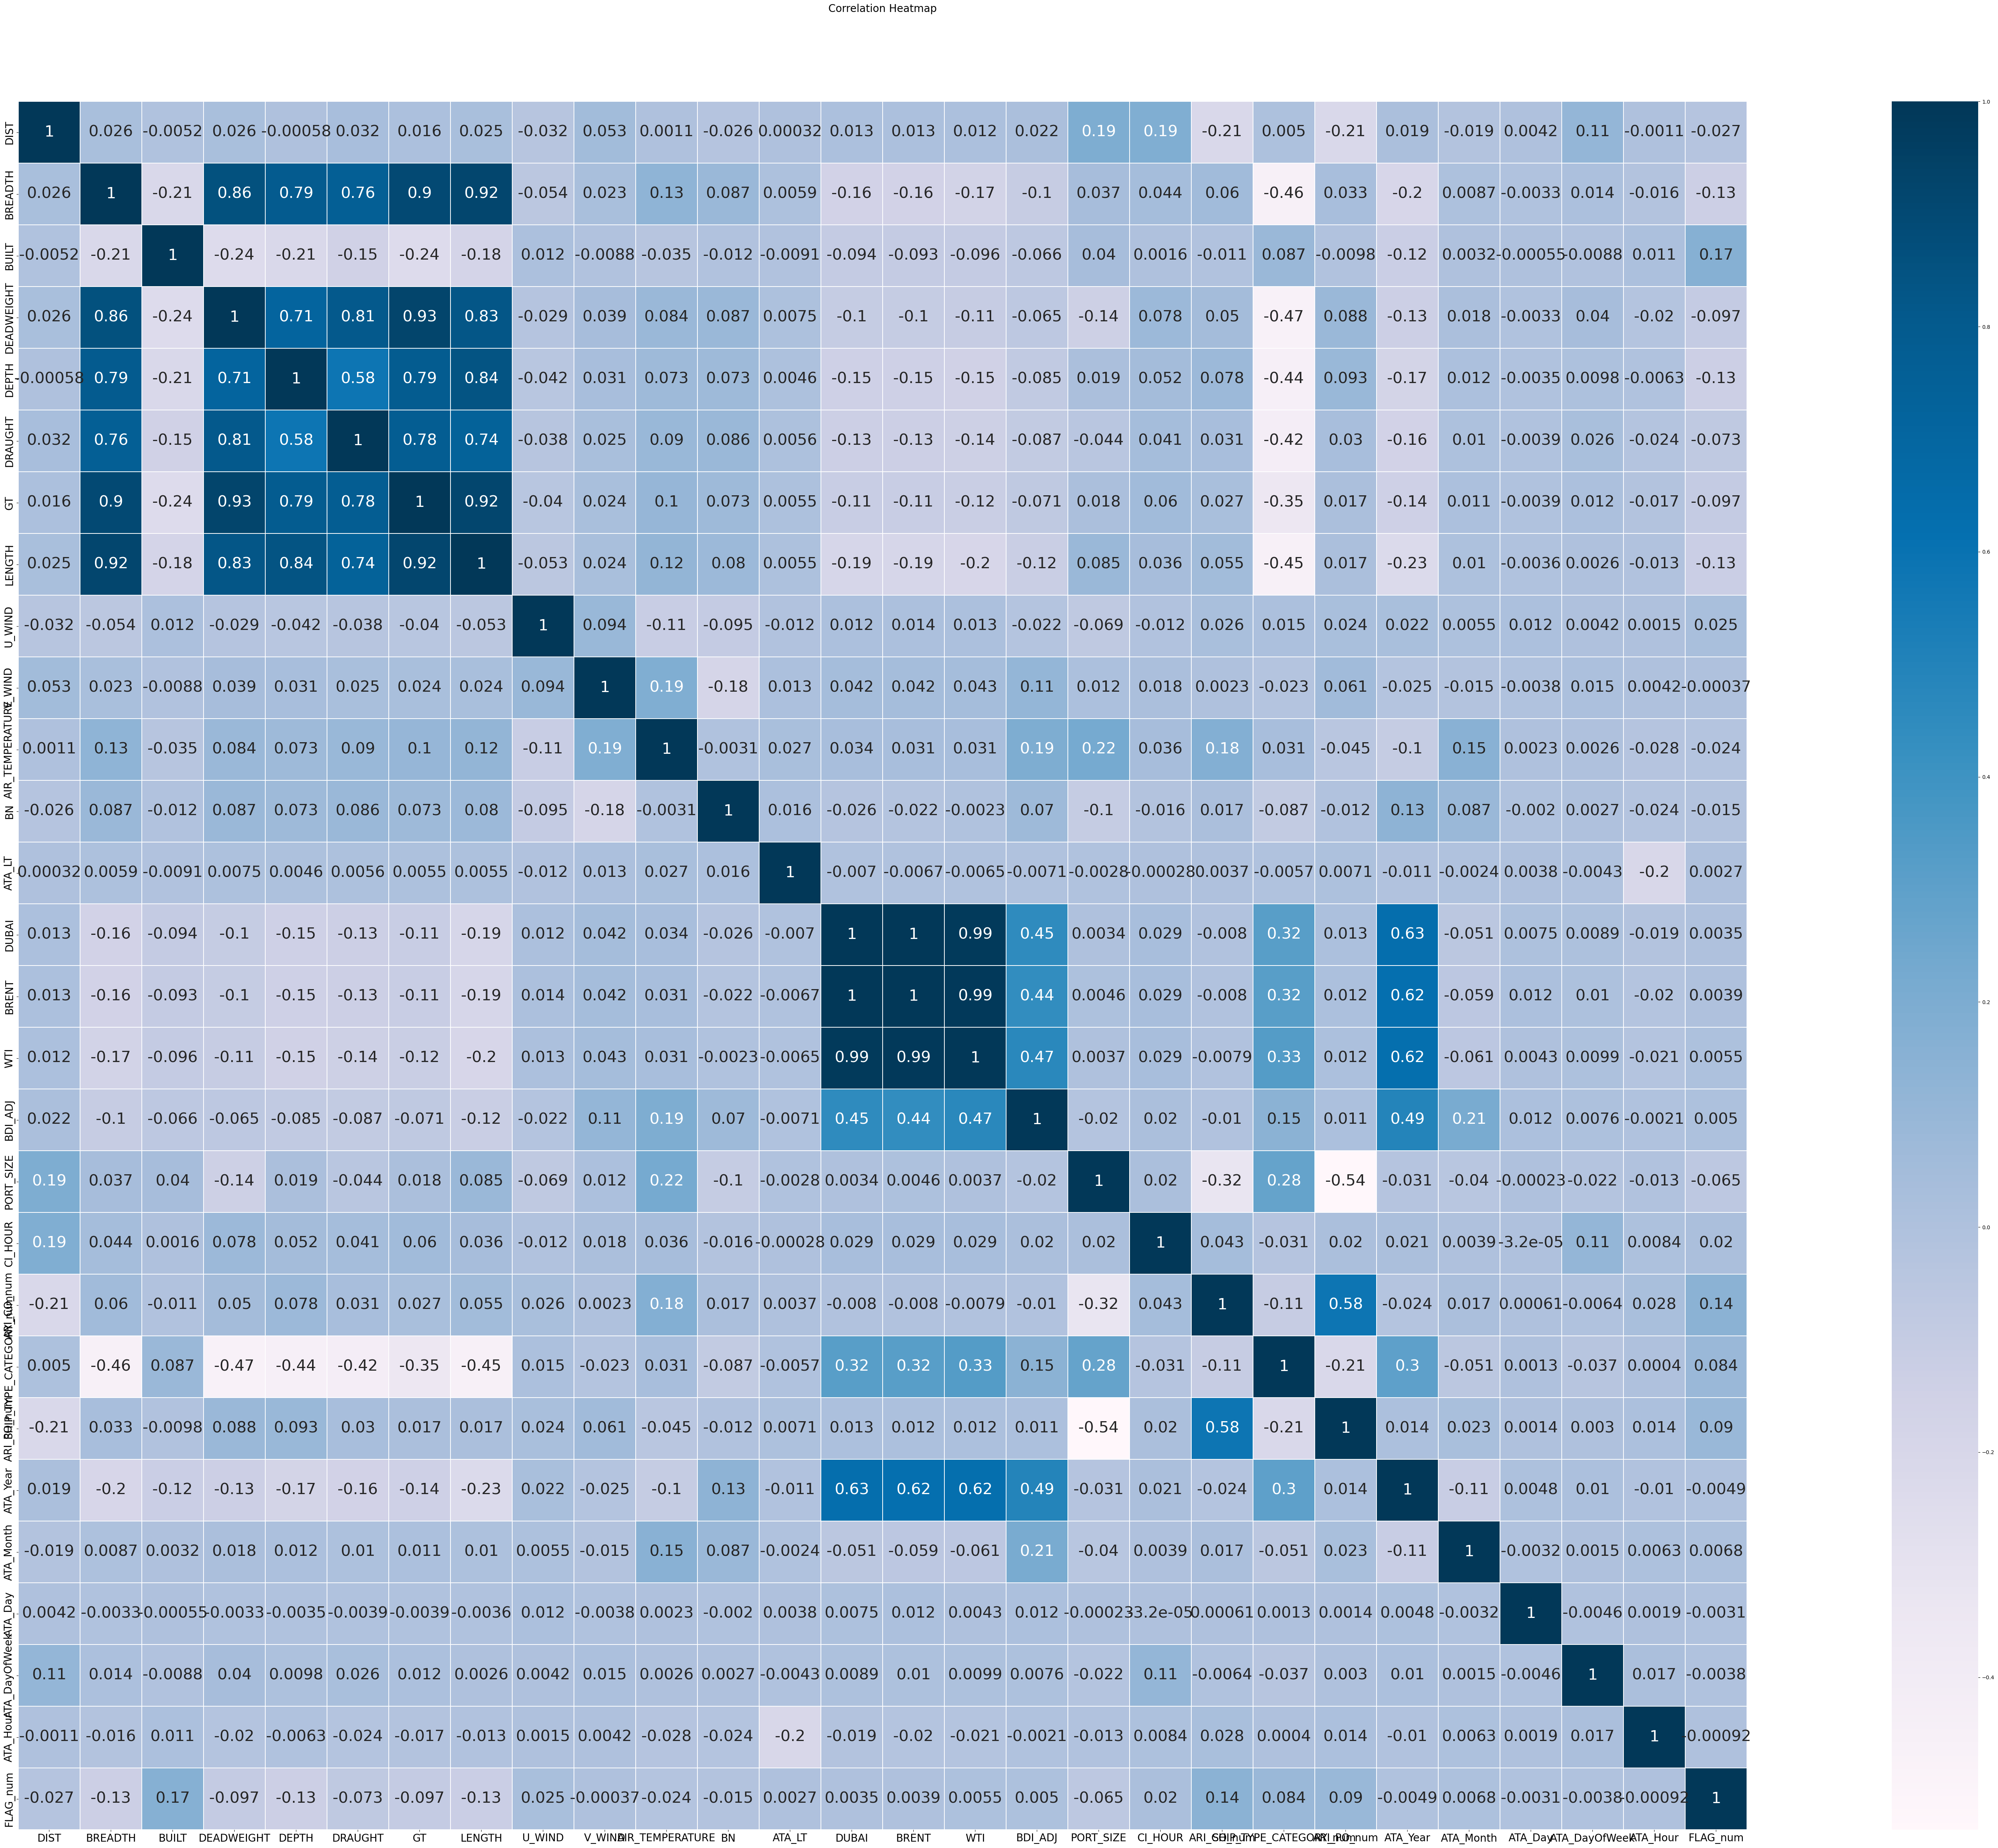

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵을 생성할 데이터프레임 (예제에서는 data_dropped를 사용)
colormap = plt.cm.PuBu
plt.figure(figsize=(100, 60))  # 그래프 크기 조절
plt.title("Correlation Heatmap", y=1.05, size=20)  # 제목 설정

# 상관 행렬을 히트맵으로 시각화
heatmap = sns.heatmap(data_dropped.astype(float).corr(), linewidths=0.1, vmax=1.0,
                      square=True, cmap=colormap, linecolor="white", annot=True, annot_kws={"size": 30})  # 레이블 크기 조절

# 가로 축 레이블 폰트 크기 조절
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=20)

# 세로 축 레이블 폰트 크기 조절
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=20)

plt.show()
